# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.3.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [13]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [14]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [15]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [16]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [17]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [18]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [19]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [20]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [23]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [28]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
hp_df_sort = hp_df.sort_values(by='year', ascending=True)
print('Total Harry Potter Movies:', hp_df_sort)

Total Harry Potter Movies:                                                title  year
223087         Harry Potter and the Sorcerer's Stone  2001
82791        Harry Potter and the Chamber of Secrets  2002
61957       Harry Potter and the Prisoner of Azkaban  2004
187926           Harry Potter and the Goblet of Fire  2005
50581      Harry Potter and the Order of the Phoenix  2007
109213        Harry Potter and the Half-Blood Prince  2009
152831  Harry Potter and the Deathly Hallows: Part 1  2010
143147  Harry Potter and the Deathly Hallows: Part 2  2011


### How many movies were made in the year 2017?

In [29]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [30]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [31]:
len(movies[(movies['year'] >= 2000) & (movies['year'] <= 2018)]) 

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [36]:
len(movies[movies['title'] == 'Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [45]:
ham_movs = movies[movies['title'] == 'Hamlet']
ham_movs_sort = ham_movs.sort_values(by='year')
print(ham_movs_sort)

         title  year
181090  Hamlet  1910
124506  Hamlet  1911
118535  Hamlet  1913
46344   Hamlet  1921
73869   Hamlet  1948
140203  Hamlet  1954
155004  Hamlet  1964
222156  Hamlet  1969
218339  Hamlet  1973
8214    Hamlet  1976
180979  Hamlet  1987
98326   Hamlet  1990
241149  Hamlet  1996
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [61]:
cast[(cast['title'] == 'Inception') & (cast['n'].isnull())]


,title,year,name,type,character,n
98153,Inception,2010,Michael (III) August,actor,LAX Passenger,NaN
197877,Inception,2010,Ken Bhan,actor,Mombasan Gambler,NaN
374661,Inception,2010,John Ceallach,actor,LAX Passenger,NaN
497161,Inception,2010,Garvin Cross,actor,Snow Commander,NaN
684098,Inception,2010,Seve Esposito,actor,Italian Gambler,NaN
690634,Inception,2010,Marcus (II) Everett,actor,Stock Broker,NaN
707642,Inception,2010,Zachary Christopher Fay,actor,Extra,NaN
836295,Inception,2010,Daniel Girondeaud,actor,Bridge Sub Con,NaN
1006636,Inception,2010,Andrew Hoagland,actor,Pedestrian,NaN
1095095,Inception,2010,Charles Jarrell,actor,Hotel Guest,NaN


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [65]:
cast[(cast['title'] == 'Inception') & (cast['n'].isnull()==False)]


,title,year,name,type,character,n
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
260128,Inception,2010,Virgile Bramly,actor,Bridge Sub Con,29.0
326745,Inception,2010,Michael Caine,actor,Miles,11.0
333415,Inception,2010,Earl Cameron,actor,Elderly Bald Man,20.0
433867,Inception,2010,Nicolas Clerc,actor,Bridge Sub Con,26.0
444385,Inception,2010,Adam (IV) Cole,actor,Bar Sub Con,34.0
517227,Inception,2010,Jean-Michel Dagory,actor,Bridge Sub Con,30.0
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
709436,Inception,2010,Russ Fega,actor,Cab Driver,23.0


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [72]:
top_cast=cast[(cast['title'] == 'Inception') & (cast['n'].isnull()==False)]
print(top_cast.sort_values('n').head(10))


             title  year                  name     type        character     n
590576   Inception  2010     Leonardo DiCaprio    actor             Cobb   1.0
859993   Inception  2010  Joseph Gordon-Levitt    actor           Arthur   2.0
3387147  Inception  2010            Ellen Page  actress          Ariadne   3.0
940923   Inception  2010             Tom Hardy    actor            Eames   4.0
2406531  Inception  2010          Ken Watanabe    actor            Saito   5.0
1876301  Inception  2010            Dileep Rao    actor            Yusuf   6.0
1615709  Inception  2010        Cillian Murphy    actor   Robert Fischer   7.0
183937   Inception  2010          Tom Berenger    actor         Browning   8.0
2765969  Inception  2010      Marion Cotillard  actress              Mal   9.0
1826027  Inception  2010    Pete Postlethwaite    actor  Maurice Fischer  10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [95]:
# cast_movies = cast.merge(movies, on=['title', 'year'])
ad_movies = cast[cast['character'].str.contains('Albus Dumbledore', case=False)]
print(ad_movies['title'])


704984                                       Epic Movie
792419     Harry Potter and the Deathly Hallows: Part 1
792420     Harry Potter and the Deathly Hallows: Part 2
792421              Harry Potter and the Goblet of Fire
792422           Harry Potter and the Half-Blood Prince
792423        Harry Potter and the Order of the Phoenix
792424         Harry Potter and the Prisoner of Azkaban
947789          Harry Potter and the Chamber of Secrets
947790            Harry Potter and the Sorcerer's Stone
1685537                           Ultimate Hero Project
1893421    Harry Potter and the Deathly Hallows: Part 1
2248085                                          Potter
Name: title, dtype: object


In [96]:
# cast_movies = cast.merge(movies, on=['title', 'year'])
ad_movies = cast[cast['character'].str.contains('Albus Dumbledore', case=False)]
print(ad_movies.agg('name').unique())

['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Toby Regbo' 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [140]:
kr_movies = cast[(cast['n'].isnull()==False) & (cast['name'].str.contains('Keanu Reeves', case=False))]
print(kr_movies.agg('name').count())

58


In [141]:
kr_movies = cast[(cast['n'].isnull()==False) & (cast['name'].str.contains('Keanu Reeves', case=False)) & (cast['year']>=1999)]
print(kr_movies[['year','character']].sort_values(by='year'))

         year             character
1892370  1999               Himself
1892369  1999               Dogstar
1892390  1999                   Neo
1892398  2000               Griffin
1892397  2000           Shane Falco
1892387  2000      Donnie Barksdale
1892383  2001           Nelson Moss
1892358  2001         Conor O'Neill
1892379  2003         Julian Mercer
1892391  2003                   Neo
1892392  2003                   Neo
1892351  2005               Dogstar
1892348  2005      John Constantine
1892400  2005           Perry Lyman
1892388  2006            Alex Wyler
1892343  2006            Bob Arctor
1892382  2008  Detective Tom Ludlow
1892385  2008                Klaatu
1892396  2009          Chris Nadeau
1892359  2010           Henry Torne
1892342  2013                   Kai
1892368  2013           Donaka Mark
1892361  2014             John Wick
1892366  2015                  Evan
1892365  2016                 Keanu
1892393  2016                  Hank
1892353  2016      Detective

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [130]:
cast[(cast['year'] >= 1950) & (cast['year'] <= 1960)].agg('character').count()

234635

In [131]:
cast[(cast['year'] >= 2007) & (cast['year'] <= 2017)].agg('character').count()

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [136]:
cast[(cast['year'] >= 2000) & (cast['n'].isnull()==False)].agg('character').count()

1062278

In [142]:
cast[(cast['year'] >= 2000) & (cast['n'] < 10)].agg('character').count()

427198

In [143]:
cast[(cast['year'] >= 2000) & (cast['n'].isnull())].agg('character').count()

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [144]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

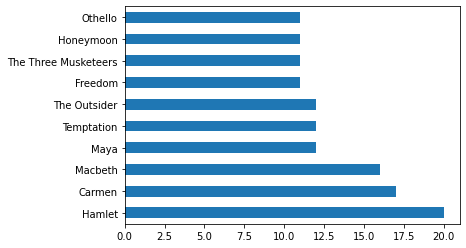

In [145]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [167]:
mov_years = movies[(movies['year']>=2000) & (movies['year']<3000)].groupby('year').count()
mov_years.sort_values(by='title', ascending=False).iloc[:3]

,title
year,
2017,11474
2016,9440
2015,8702


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:>

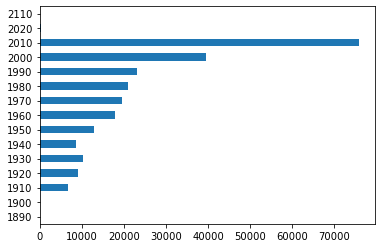

In [186]:
movies['decade'] = movies['year'] - movies['year']%10
mov_year = movies.decade.value_counts()
mov_year = mov_year.sort_index()
mov_year.plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [188]:
print(cast.value_counts('character').head(10))


character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
dtype: int64


In [192]:
print(cast[cast['character'].str.contains('Herself', case=False)].value_counts('name').head(10))

name
Queen Elizabeth II                  18
Jacqueline Kennedy                  12
Joyce Brothers                      10
Margaret Thatcher                   10
Hillary Clinton                      9
Mar?a Luisa (V) Mart?n               9
Luisa Horga                          9
Pat Nixon                            8
Caroline Kennedy                     7
Queen Elizabeth the Queen Mother     7
dtype: int64


In [193]:
print(cast[cast['character'].str.contains('Himself', case=False)].value_counts('name').head(10))

name
Adolf Hitler             115
Richard Nixon             54
John F. Kennedy           49
Ronald Reagan             46
Winston Churchill         28
George W. Bush            28
Benito Mussolini          26
Martin Luther King        26
Franklin D. Roosevelt     25
Bill Clinton              23
dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [199]:
print(cast[cast['character'].str.startswith('Zombie')].value_counts('character').head(10))

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
dtype: int64


In [197]:
print(cast[cast['character'].str.startswith('Police')].value_counts('character').head(10))

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
dtype: int64


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [201]:
kr_movies = cast[(cast['name'].str.contains('Keanu Reeves', case=False))]
print(kr_movies[['year','character']].groupby('year').count())

      character
year           
1985          1
1986          3
1988          4
1989          2
1990          2
1991          3
1992          1
1993          4
1994          1
1995          2
1996          2
1997          2
1999          3
2000          3
2001          2
2003          3
2005          3
2006          2
2008          2
2009          1
2010          1
2012          1
2013          2
2014          1
2015          1
2016          5
2017          3
2018          1
2019          1


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:xlabel='year'>

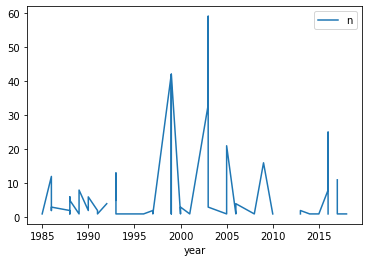

In [217]:
kr_movies = cast[(cast['name'].str.contains('Keanu Reeves', case=False))]
kr_plot = kr_movies[['year', 'n']].sort_values('year')
# print(kr_plot.head())
kr_plot.plot(x='year', y='n')


### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:xlabel='decade'>

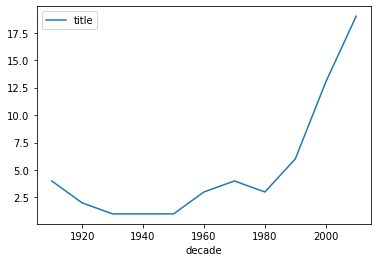

In [29]:
movies['decade'] = (movies['year'] - (movies['year']%10))
# movies['decade_int'] = (movies['decade'].astype('str'))

assert movies['decade'].dtype == 'int'

hamlet_movs = movies[movies['title'].str.contains("Hamlet", case=False)]
# print(hamlet_movs)
hamlet_plot = hamlet_movs.groupby('decade').count()
# print(hamlet_plot)
hamlet_plot.plot(y='title')


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [39]:
roles60s = cast[(cast['n']<11) & (cast['year']>=1960) & (cast['year']<1970)]
roles60s['title'].count()

86122

In [40]:
roles2000 = cast[(cast['n']<11) & (cast['year']>=2000) & (cast['year']<2010)]
roles2000['title'].count()

204299

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [57]:
fo_movs = cast[cast['name'].str.contains('Frank Oz', case=False)]
fo_movs_sort = fo_movs.sort_values(by=['year','title'])
nearly = fo_movs_sort.groupby(['year', 'title']).count()
print(nearly[nearly['n']>1])


                                           name  type  character  n
year title                                                         
1979 The Muppet Movie                         8     8          8  8
1981 An American Werewolf in London           2     2          2  2
     The Great Muppet Caper                   6     6          6  6
1982 The Dark Crystal                         2     2          2  2
1984 The Muppets Take Manhattan               7     7          7  7
1985 Follow That Bird                         3     3          3  3
1992 The Muppet Christmas Carol               7     7          7  7
1996 Muppet Treasure Island                   4     4          4  4
1999 Muppets from Space                       4     4          4  4
     The Adventures of Elmo in Grouchland     3     3          3  3


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [60]:
fo_movs = cast[cast['name'].str.contains('Frank Oz', case=False)]
fo_movs_sort = fo_movs.sort_values(by=['year','title'])
nearly = fo_movs_sort.groupby(['year', 'title']).count()
print(nearly[nearly['n']>2])


                                           name  type  character  n
year title                                                         
1979 The Muppet Movie                         8     8          8  8
1981 The Great Muppet Caper                   6     6          6  6
1984 The Muppets Take Manhattan               7     7          7  7
1985 Follow That Bird                         3     3          3  3
1992 The Muppet Christmas Carol               7     7          7  7
1996 Muppet Treasure Island                   4     4          4  4
1999 Muppets from Space                       4     4          4  4
     The Adventures of Elmo in Grouchland     3     3          3  3


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

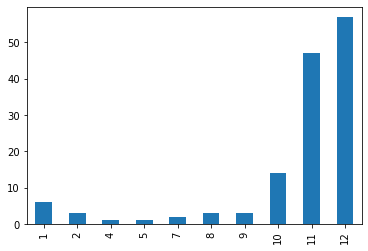

In [61]:
v

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

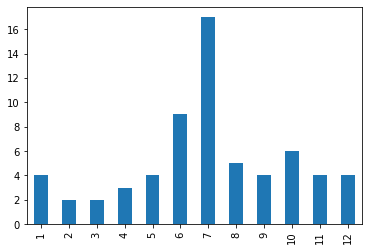

In [62]:
christmas = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:>

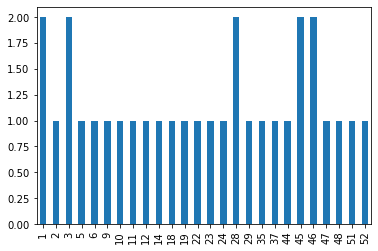

In [64]:
christmas = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
christmas.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [92]:
cast_dates = cast[cast['name']=="Keanu Reeves"].merge(release_dates[release_dates['country']=='USA'], on=['title','year'], how='left')
nearly = cast_dates[(cast_dates['name'].str.contains('Keanu Reeves')) & (cast_dates['n'] < 2)].sort_values('year')
print(nearly[['year','title']])


    year                             title
31  1985                     One Step Away
52  1988                  The Night Before
4   1989  Bill & Ted's Excellent Adventure
3   1991        Bill & Ted's Bogus Journey
25  1993                     Little Buddha
38  1994                             Speed
2   1995              A Walk in the Clouds
22  1995                   Johnny Mnemonic
5   1996                    Chain Reaction
12  1996                 Feeling Minnesota
44  1997              The Devil's Advocate
48  1999                        The Matrix
55  2000                  The Replacements
16  2001                         Hard Ball
41  2001                    Sweet November
6   2005                       Constantine
46  2006                    The Lake House
40  2008                      Street Kings
43  2008     The Day the Earth Stood Still
17  2010                     Henry's Crime
0   2013                          47 Ronin
19  2014                         John Wick
24  2015   

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

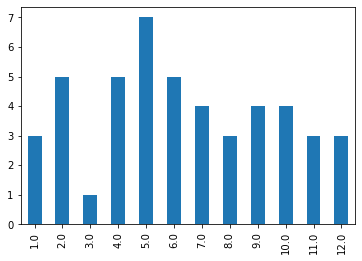

In [94]:
cast_dates = cast[cast['name']=="Keanu Reeves"].merge(release_dates[release_dates['country']=='USA'], on=['title','year'], how='left')
cast_dates.date.dt.month.value_counts().sort_index().plot(kind='bar')


### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:>

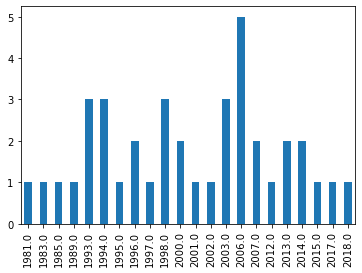

In [95]:
cast_dates = cast[cast['name']=="Ian McKellen"].merge(release_dates[release_dates['country']=='USA'], on=['title','year'], how='left')
cast_dates.date.dt.year.value_counts().sort_index().plot(kind='bar')
